In [1]:
!pip3 install catboost

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
%matplotlib inline

In [2]:
df = pd.read_csv("features_3_sec.csv")

label2index = dict()
index2label = dict()
for i,unq_label in enumerate(df.label.unique()):
    label2index[unq_label] = i
    index2label[i] = unq_label
df.label = [label2index[l] for l in df.label]
df = df.sample(frac=1).reset_index(drop=True)
df.drop(labels = ['filename','length'], axis=1, inplace = True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
my_scaler = StandardScaler()
df_X = pd.DataFrame(my_scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(df_X, y, train_size=0.9, stratify = y)

Saving the Xy_train and Xy_test so that train and test won't get mixed up afterwards.

In [5]:
aaa = X_train.assign(label=y_train.values)
bbb = X_test.assign(label=y_test.values)
aaa.to_csv("Xy_train.csv",index=False)
bbb.to_csv("Xy_test.csv",index=False)

In [6]:
cat = CatBoostClassifier(loss_function='MultiClass', verbose=False)
cat.fit(X_train,y_train)
y_pred = cat.predict(X_test)
precision_cat = precision_score(y_test, y_pred,average='macro')
accuracy_cat = accuracy_score(y_test, y_pred)
f1_cat = f1_score(y_test, y_pred,average='macro')
recall_cat = recall_score(y_test, y_pred,average='macro')
print(precision_cat)
print(accuracy_cat)
print(f1_cat)
print(recall_cat)

0.9028642209594452
0.9029029029029029
0.9026165359007589
0.902858585858586


In [7]:
with open('model_cat.pkl', 'wb') as f:
    pickle.dump(cat, f)

In [3]:
rforest_normal = RandomForestClassifier(n_estimators=1000)
rforest_normal.fit(X_train,y_train)

y_pred = rforest_normal.predict(X_test)
precision_r = precision_score(y_test, y_pred,average='macro')
accuracy_r = accuracy_score(y_test, y_pred)
f1_r = f1_score(y_test, y_pred,average='macro')
recall_r = recall_score(y_test, y_pred,average='macro')
print(precision_r)
print(accuracy_r)
print(f1_r)
print(recall_r)

0.8941190013666036
0.8938938938938938
0.8935004309791237
0.8938787878787879


In [4]:
with open('model_rforest.pkl', 'wb') as f:
    pickle.dump(rforest_normal, f)

In [5]:
ada1 = AdaBoostClassifier(base_estimator = rforest_normal,n_estimators=5)
ada1.fit(X_train,y_train)
y_pred = ada1.predict(X_test)
precision_ada = precision_score(y_test, y_pred,average='macro')
accuracy_ada = accuracy_score(y_test, y_pred)
f1_ada = f1_score(y_test, y_pred,average='macro')
recall_ada = recall_score(y_test, y_pred,average='macro')
print(precision_ada)
print(accuracy_ada)
print(f1_ada)
print(recall_ada)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9060257548072432
0.9039039039039038
0.9028920433888905
0.9038484848484849


In [6]:
with open('model_ada.pkl', 'wb') as f:
    pickle.dump(ada1, f)

In [12]:
sgd = SGDClassifier(max_iter=500)
sgd_final = BaggingClassifier(base_estimator = sgd,
                          n_estimators = 10,
                          max_samples=0.63, oob_score=True)
sgd_final.fit(X_train,y_train)
y_pred = sgd_final.predict(X_test)
precision_sgd = precision_score(y_test, y_pred,average='macro')
accuracy_sgd = accuracy_score(y_test, y_pred)
f1_sgd = f1_score(y_test, y_pred,average='macro')
recall_sgd = recall_score(y_test, y_pred,average='macro')
print(precision_sgd)
print(accuracy_sgd)
print(f1_sgd)
print(recall_sgd)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6833330777964721
0.6846846846846847
0.6816629624464313
0.6846464646464647


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [13]:
with open('model_sgd.pkl', 'wb') as f:
    pickle.dump(sgd_final, f)

In [15]:
gaussian_NB = GaussianNB()
gaussian_NB_final = BaggingClassifier(base_estimator = gaussian_NB, n_estimators = 100,max_samples=0.63, oob_score=True)
gaussian_NB_final.fit(X_train,y_train)
y_pred = gaussian_NB_final.predict(X_test)
precision_gaussian = precision_score(y_test, y_pred,average='macro')
accuracy_gaussian = accuracy_score(y_test, y_pred)
f1_gaussian = f1_score(y_test, y_pred,average='macro')
recall_gaussian = recall_score(y_test, y_pred,average='macro')
print(precision_gaussian)
print(accuracy_gaussian)
print(f1_gaussian)
print(recall_gaussian)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.5177470293525854
0.5115115115115115
0.4944571540464069
0.5115656565656566


In [16]:
with open('model_gaussian.pkl', 'wb') as f:
    pickle.dump(gaussian_NB_final, f)

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[22,  0, 18,  4,  0,  7, 34,  0,  6,  9],
       [ 1, 90,  0,  0,  0,  4,  0,  0,  2,  3],
       [ 7,  3, 56,  7,  2,  2,  9,  3,  5,  5],
       [ 2,  0, 13, 31,  5,  0, 21,  9,  8, 11],
       [ 1,  0,  8, 16, 37,  0, 13, 14, 10,  1],
       [ 1, 16, 17,  3,  0, 47,  2,  3,  2,  9],
       [ 0,  1,  2,  1,  0,  0, 89,  0,  1,  6],
       [ 1,  0,  8,  7,  3,  2,  0, 76,  2,  1],
       [14,  0, 16,  1, 13,  2,  0,  7, 43,  4],
       [ 6,  4, 12, 12,  2,  1, 39,  1,  3, 20]], dtype=int64)

In [18]:
my_classes = ['blues','classical','country','disco',\
              'hiphop','jazz','metal','pop','reggae','rock']

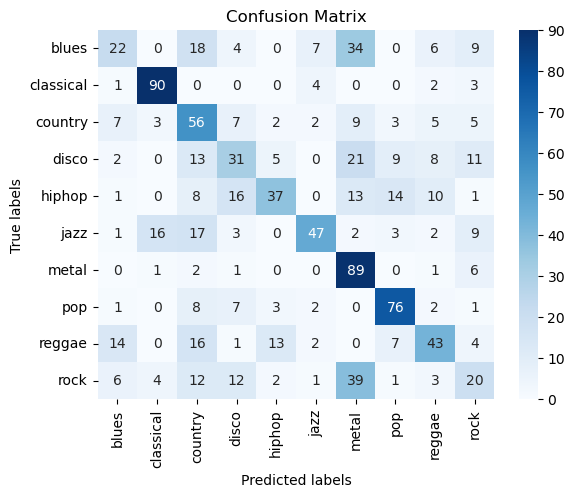

In [19]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=my_classes, yticklabels=my_classes, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.ensemble import VotingClassifier

In [31]:
voting_clf = VotingClassifier(
    estimators=[('gaussian_NB', gaussian_NB_final), ('SGD', sgd_final), ('r_forest_tuned', rforest_normal),('ada',ada1),('cat',cat)],
    voting='soft'
)

# Train the voting classifier on the training set
voting_clf.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('gaussian_NB',
                              BaggingClassifier(base_estimator=GaussianNB(),
                                                max_samples=0.63,
                                                n_estimators=100,
                                                oob_score=True)),
                             ('SGD',
                              BaggingClassifier(base_estimator=SGDClassifier(max_iter=500),
                                                max_samples=0.63,
                                                oob_score=True)),
                             ('r_forest_tuned',
                              RandomForestClassifier(n_estimators=1000)),
                             ('ada',
                              AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
                                                 n_estimators=5)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001877259A0B0>)],
                 voting='soft')

In [32]:
final_y_pred = voting_clf.predict(X_test)

In [33]:
precision_vote = precision_score(y_test, final_y_pred,average='macro')
accuracy_vote = accuracy_score(y_test, final_y_pred)
f1_vote = f1_score(y_test, final_y_pred,average='macro')
recall_vote = recall_score(y_test, final_y_pred,average='macro')
print(precision_vote)
print(accuracy_vote)
print(f1_vote)
print(recall_vote)

0.8296582015564254
0.8288288288288288
0.8279252632375727
0.8287979797979798
